# ***SECONDA PARTE TECNICHE DI PROGRAMMMAZIONE***

**INTERVAL SCHEDULING**

***che cos'è un interval scheduling algorithm?***

è una classe di problemi. i programmi hanno un numero di compiti, ed ognuno di essi è rappresentato da un intervallo che indica il lasso di tempo che la macchina impiega a svolgerlo; se non ci sono sovrapposizioni (overlap) tra due intervalli, essi formano un sottoinsieme di intervalli compatibili (subset of intervals is compatible)

*lo **scopo dell'interval scheduling** è quello di massimizzare il problema, identificando il più largo subset compatibile in quella collezione di intervalli (senza overlap)*

e quindi andiamo ad ottimizzare andando a completare più compiti (tasks) possibili

andiamo quindi ad analizzare ciò che abbiamo nell'algoritmo:



*   **INPUT**: una lista di n intervalli; l'i-esimo intervallo viene presentato come una lista/tupla (s_i, f_i) ovvero sono presenti il tempo di inizio e di fine ( 1 <= i <= n )
*   **OUTPUT**: viene restituito il subset che contiene il numero massimo di intervalli non in overlap



quindi ad esempio andiamo a considerare l'immagine qui sotto (gli intervalli sono sortati secondo il momento di inizio):
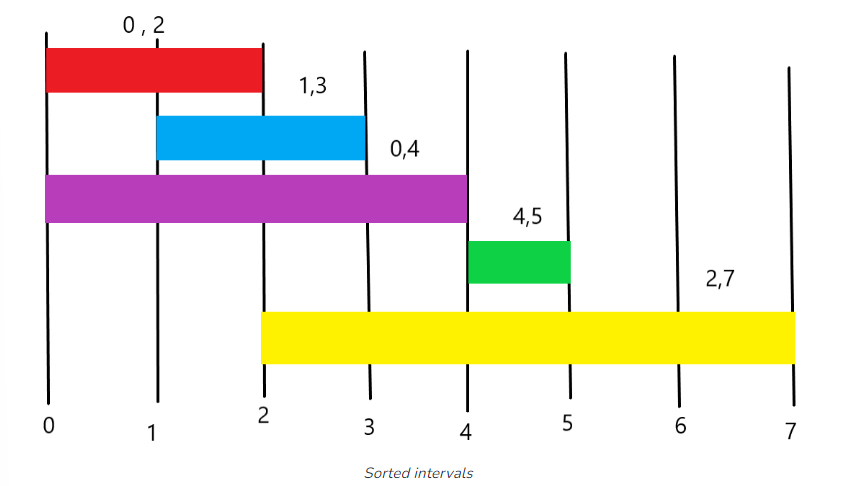

quihdi avendo gli intervalli [(0,2), (0,4), (1,3), (2,7), (4,5)], una possibile soluzione sarebbe restituire il subset [(0,2), (4,5)]



In [ ]:
# andiamo ad implementare

def interval_scheduling(intervals):
  intervals.sort(key = lambda x: x[1]) # andiamo a sortare rispetto al tempo di inizio
  count = 0 # contiamo il numero di intervalli
  end = 0 #fine dell'ultimo intervallo preso in considerazione
  res = []

  for interval in intervals:
    if end <= interval[0]: # non c'è overlap
      end = interval[1] # aggiorniamo la fine presa in considerazione
      count += 1
      res.append(interval)

  return res


ovviamente nel codice ho usato la funzione sort perché in questo caso voglio vedere solo come massimizzare gli intervalli, però ovviamente invece di usare la funzione sort ne usiamo un'altra esterna con complessità di O(nlogn)

**WEIGHTED INTERVAL SCHEDULING**

rispetto al caso sopra, ogni intervallo presenta un "peso differente" e quindi quando andiamo a massimizzare il subset, dobbiamo anche considerare quello.

quindi diciamo che viene data in input una lista con ***n jobs caratterizzati da***:
1. *start time*
2. *finish time*
3. *value (>=0)*

e vogliamo andare a massimizzare il profitto, in modo tale che non ce ne siamo due in overlap.

diciamo che il problema visto sopra dell'interval scheduling è un caso particolare di questo solo che tutti i valori degli intervalli sono uguali.



vediamo come andiamo ad implementare l'algoritmo:



1.   andiamo prima a sortare la lista in base al finish time
2.   applichiamo un processo ricorsivo che si basa:


        *   se l'array ha lunghezza 1 semplicemente si ritorna il singolo intervallo (caso base)
        *   altrimenti si ritorna il massimo profitto tra i due casi:
        1. massimo profitto prendendo in considerazione quel job
        2. massimo profitto prendendo in considerazione quel current job

ora, il problema di questo algoritmo è che ha una complessità troppo elevata equivalente a quella dei numeri di fibonacci infatti è O(n*2^n) quindi abbastanza improponibile. un'altra versione è quella in cui viene utilizzata la programmazione dinamica con cui la complessità è O(n^2)

inoltre ne esiste un'altra che va a sfruttare la binary search ed in questo caso abbiamo una complessità del tipo O(nlogn)


sotto andrò a scrivere la versione sia usando la programmazione dinamica che usando la binary search









In [ ]:

# definizione della classe per un generico job
class Job:
  def __init__(self, start, finish, value):
    self.start = start
    self.finish = finish
    self.value = value


In [ ]:
# vediamo la versione con la binary search

# questa funzione ci serve per trovare l'ultimo job (prima del current job) che non entra
# in conflitto con il current job e ritorna -1 se questo job non esiste
def binary_search(job, start_index):
  low = 0
  high = start_index -1

  while low <= high:
    mid = (low+high) // 2

    if job[mid].finish <= job[start_index].start:
      if job[mid+1].finish <= job[start_index].start:
        low = mid+1
      else:
        return mid
    else:
      high = mid-1

  return -1

# questa è la main function che ritorna il massimo profitto possibile dato un array di jobs


def schedule(job):

  # sortiamo rispetto al tempo di fine
  job = sorted(job, key = lambda x: x.finish)

  n = len(job)
  table = [0 for i in range(n)]
  # table[i] indica il profitto dei lavori fino al job i-esimo (incluso)

  table[0] = job[0].value

  for i in range(1,n):

    # troviamo il profitto includendo il current job
    inclProf = job[i].value
    l = binary_search(job, i)

    if l != -1:
      inclProf += table[l]

    # questo ci permette di capire se è meglio includere o meno l'i-esimo job
    table[i] = max(inclProf, table[i-1])

  return table[n-1]





*time complessity*: **O(nlogn)**

*auxiliary space*: O(n) per via dell0array table

In [ ]:
# versione usando la prog. dinamica

def find_sum(arr):
  summ = 0
  for i in range(len(arr)):
    summ += arr[i].value

  return summ


# main function

def findMaxProf(arr):
  arr.sort(key = lambda x: x.start)

  l = [[] for i in range(len(arr))]
  l[0].append(arr[0])

  for i in range(1, len(arr)):
    for j in range(i):
      if arr[j].finish <= arr[i].start and find_sum(l[j]) > find_sum(l[i]): # se non sono in overlap and la somma mettendo j è maggiore di quella fino a i
        l[i] = l[j][:]

    l[i].append(arr[i])


  maxchain = []

  for i in range(len(l)):
    if find_sum(l[i]) > find_sum(maxchain):
      maxchain = l[i]

  for i in range(len(maxchain)):
    print("({},{},{})".format(maxchain[i].start, maxchain[i].finish, maxchain[i].value), end=' ')




In [ ]:
a = [Job(3, 10, 20), Job(1, 2, 50), Job(6, 19, 100), Job(2, 100, 200)]
findMaxProf(a)

(1,2,50) (2,100,200) 

* **Costruzione delle Catene:** Il codice costruisce le catene di lavori non sovrapposti in modo incrementale. Per ogni intervallo i, cerca di vedere se può essere aggiunto a una catena esistente che termina con un intervallo j precedente, a condizione che j non si sovrapponga con i e che la somma dei valori della nuova catena (aggiungendo j) sia maggiore della somma attuale della catena che termina con i.

* **Scelta della Migliore Catena:** Una volta costruite tutte le catene possibili, il codice seleziona quella con la somma dei valori più alta.

una versione migliorata che però non scriverò è quella in cui non viene utilizzata lva funzione find_sum.

*time complessity:* **O(n^2)**

*auxiliary space:* O(n^2)

**KNAPSACK PROBLEM:**

abbiamo n elementi, l'i-esimo elemento viene descritto con una tupla (valore, spazio occupato) entrambi sono valori positivi. viene anche assegnato un certo valore detto *budget* (b).

*noi vogliamo trovare un subset  in cui la somma dello spazio occupato sia minore del nostro budget e al tempo stesso vogliamo massimizzare il valore totale.*

quindi arrivati all'i-esimo elemento, siamo davanti a ***due possibili casi***:


1.   budget < somma dello spazio --> Z(i,b) = Z(i-1,b) quindi non prendiamo l'i-esimo elemento poiché andremo fuori budget
2.   budget > somma spazio --> Z(i,b) = max(Z(i-1,b), Z(i-1, b-curr spazio i)+ current valore i)

il running time è di **O(n*b)**   

gli approcci esistenti per risolvere il knapsack problem sono essenzialmente:


1.   *brute force algorithm*
2.   *greedy methology*
3. *dynamic programming*

**NB**: **il knapsack problem è un algoritmo che è molto istruttivo per quanto riguarda il concetto di ottimizzazione combinatoria costruttiva.**

*riassumendo*, possiamo immaginare di avere uno stack di oggetti, tutti hanno un particolare peso (weight) e un valore (value); noi vogliamo prendere un gruppo di questi elementi il cui peso sia minore o uguale ad un limite stabilito e andando a massimizzare il valore.

vediamo ora uno per volta, (con analisi) i vari approcci:





In [ ]:
# definiamo in generale la classe che definisce il knapsack package

class knapsack(object):
  def __init__(self, weight, value):
    self.value = value
    self.weight = weight
    self.cost = value / weight

  def __lt__(self, other):
    return self.cost < other.cost

In [ ]:
# approccio greedy
# NB in questo caso abbiamo considerato che si potesse prendere
# uno stesso oggetto più volte

def knapsack_gred(W, V, M, n):
  packs = []

  for i in range(n):
    packs.append(knapsack(W[i], V[i]))

  packs.sort(reverse = True)
  remain = M
  res = 0
  i = 0
  stop = False
  while stop != True:
    if packs[i].weight <= remain:
      remain -= packs[i].weight
      result += packs[i].value
    else:
      i += 1

    if i == n:
      stop = True
  return result

in generale per il knapsack problem la scelta di un approccio greedy non è consigliata poi la scelta locale ottima non garantisce una soluzione ottima globale infatti vedendo il caso qui sotto

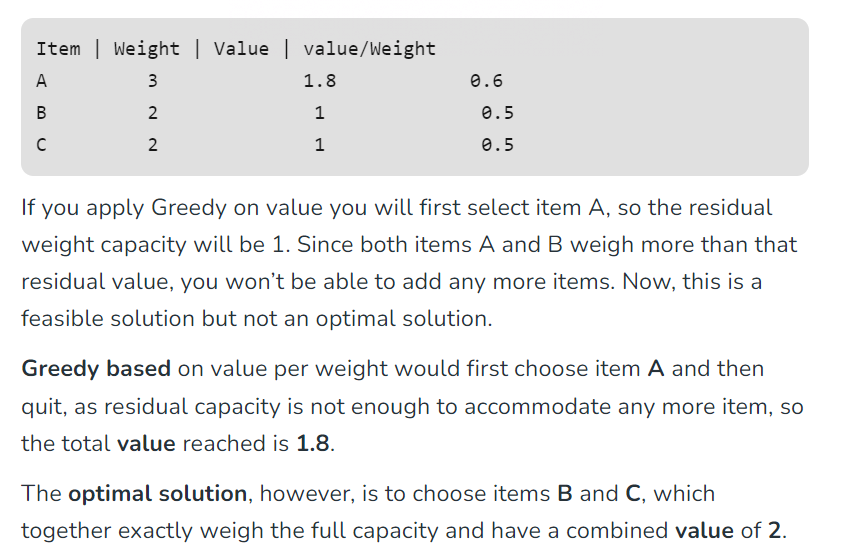

**BRUTE FORCE:**

senza che andiamo a scrivere questo algoritmo sappiamo già che non è molto conveniente al livello di complessità computazionale. è una soluzione semplice ma non efficace con una complessità di tipo esponenziale O(2^n), ha complessità spaziale di O(n).

( dovrebbe essere un approccio di tipo ricorsivo but i'm not sure )



In [ ]:
# approccio con la programmazione dinamica

def knapsack_dym(W, wt, val, n): # wt = weight
  K = [[0 for x in range(W+1)] for i in range(n+1)]

  for i in range(n+1):
    for w in range(W+1):
      if i == 0 or w == 0:
        K[i][w] = 0

      elif wt[i-1] <= w:
        K[i][w] = max(val[i-1]+ K[i-1][w-wt[i-1]], K[i-1][w] )

      else:
        K[i][w] = K[i-1][w]

  return K[n][W]

In [ ]:
#### TEST ####
profit = [60, 100, 120]
weight = [10, 20, 30]
W = 50
n = len(profit)
print(knapsack_dym(W, weight, profit, n))


220


*time complessity*:  **O(n*W)**

*auxiliary space*:  **O(n*W)** poiché abbiamo usato un array 2-D

qui sotto metto anche la versione in cui utilizziamo un array 1-D e quindi con meno complessità spaziale

In [ ]:
# con array 1-D

def knapSack_dym(W, wt, val, n):
  K = [0 for i in range(W+1)]

  for i in range(1, n+1):
      for w in range(W, 0, -1):
        if wt[i-1] <= w:

          K[w] = max(K[w], K[w-wt[i-1]]+val[i-1])

  return K[W]

**PICCOLA PARENTESI PER SPIEGARE IN GENERALE GREEDY E LA PROG. DINAMICA**

***PROG. DINAMICA***

è del tipo bottom-up. questo approccio viene usato per la risoluzione di ***problemi di ottimizzazione:***



*   il problema presenta diverse soluzioni
*   si vuole trovare una soluzione ottima con costo minimo o massimo

**NB**: cerchiamo ***una*** soluzione ottima poiché possono esistere più soluzioni ottime

riprende come idea quello del divide et impera ma con differenze sostanziali.

*tipici problemi di ottimizzazione* sono:
*   allocazione di risorse (es. merci in un magazzino)
*   scheduling (ordinamento temporale)
*   pianificazione di investimenti
*   pattern marching (più lunga sottosequenza in comune)
*   distanza minima: es. collegamento più corto tra due città

**NB: DIFFERENZA MEMOIZATION E PROG. DINAMICA**

l'obiettivo è lo stesso ovvero ricordare le soluzioni di sotto problemi che sono già state calcolate. in modo informale possiamo affermare che la memoization è un caso particolare della prog. dinamica. solitamente si parla di memoization quando si vuole rendere più efficiente un algoritmo ricorsivo. mentre nella prog. dinamica vera e propria si tende a voler rendere esplicito l'ordine temporale delle operazioni e quindi siamo davanti ad una struttura iterativa

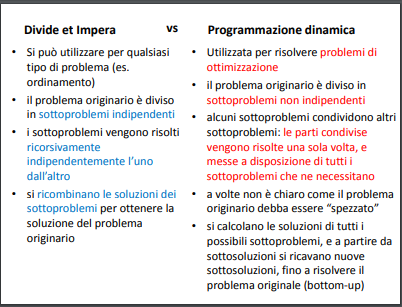












due slide che potrebbero essere utili:

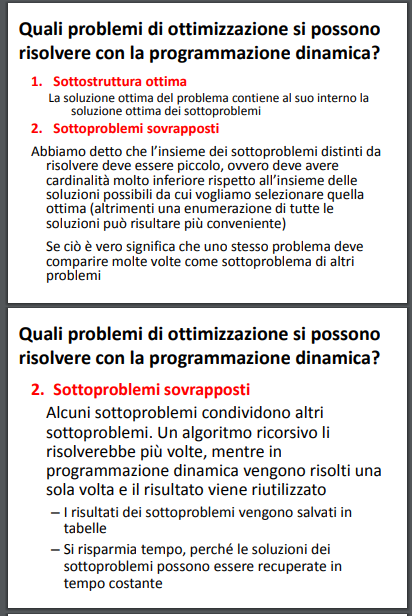

***ALGORITMI GREEDY***

quando un problema presenta una sottostruttura ottima, e siamo davanti a problemi che richiedono di compiere una serie di scelte allora si può pensare di attuare un algoritmo con approccio greedy

**NB:** in molti casi si può attuare sia la prog. dinamica che greedy la scelta ricade su una o l'altra in base al tipo di algoritmo che si vuole usare: di solito uno stesso problema risolto con greedy ha un algoritmo più semplice ed efficiente rispetto alla PD.

*l'idea principale dietro a greedy è quella di selezionare localmente sempre la scelta ottima nella speranza che questo proponga alla fine una soluzione globalmente ottima*

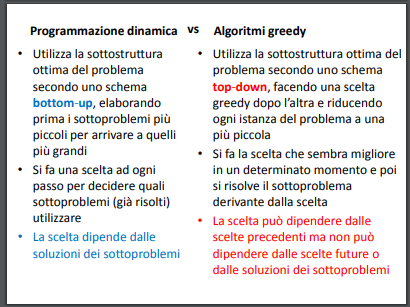



vediamo un **esempio** di una possibile situazione con algoritmo greedy.

abbiamo in input un numero positivo n e vogliamo il più piccolo intero di banconote per cambiare n euro, usando i pezzi da 20, 10, 5, 1 euro. quindi ad esempio se abbiamo n = 58 dobbiamo avere come output 20+20+10+5+1+1+1.

l'algoritmo greedy in questo caso lavora prendendo ogni volta la banconota più
grande che rientra nella restante somma

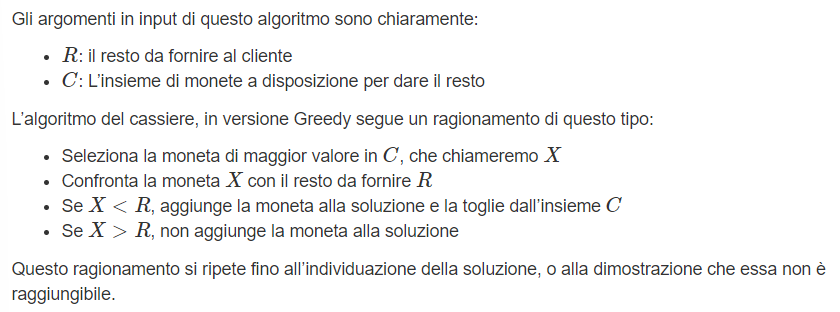

In [ ]:

def cassiere(r, c):
  print ('Devo fornire', r, 'euro di resto' )
  print ('Ho a disposizione monete di taglio:', str(c))
  c.sort()
  s = []
  while r >= 0:
    x = c[-1]
    del c[-1]
    if r>=x:
          r -= x
          s.append(x)
    if r==0:
          print ("La soluzione e':" + str(s))
          return s
    if c==[]:
          print ("Non e' possibile trovare una soluzione")
          break

  return -1




vediamo dagli esempi:

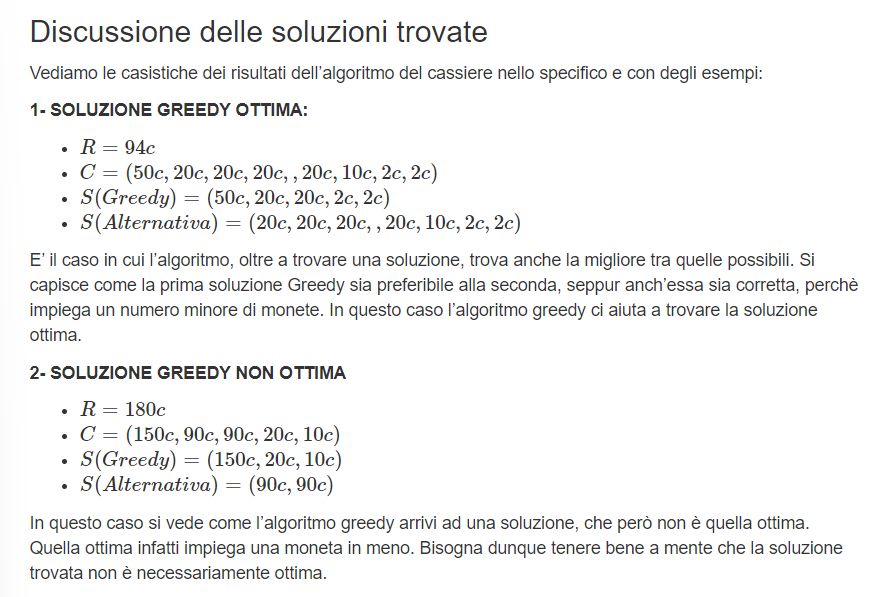

# **GRAFI**

*un grafo (o una rete) è una struttura dati che permette di rappresentare delle relazioni binarie* (un po' come gli alberi). un grafo permette di rappresentare qualsiasi tipo di relazione matematica.

sono quindi delle *potenti astrazioni* ed alcune sue applicazioni sono:

*   reti (sociali, trasporti, utenze)
*   collegamenti ipertestuali tra pagine
*   reti neurali

etc.

**DEF**: un ***grafo orientato*** (directed graph) è una coppia G = (V, E) dove:



*   V è un insieme di vertici o nodi
*   E è un insieme di coppie ordinate (u,v) di nodi dette archi o rami

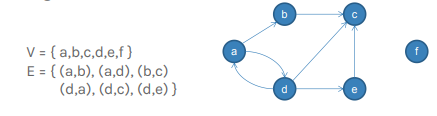




**DEF**: un ***grafo non orientato*** è una coppia G = (V, E) dove:


*   V è sempre un insieme di vertici
*   E invece è un insieme di coppie *non* ordinate




vediamo qualche ***definizione di base***



*   **multigrafo** = E è un multinsieme, **pseudografo** = E contiene anche coppie del tipo (v,v) dette cappi (loop)
*   **cammino** = di lunghezza k, una sequenza di vertici, **circuito** = un cammino in cui v1 = vk, **ciclo** = un circuito senza vertici ripetuti


*   un vertice v è detto **adiacente** a u se esiste un arco (u,v), e in questo caso l'arco è detto **incidente**, **grado** = di un nodo, è il numero di archi incidenti (nel caso di grafi orientati si parla di grado entrante e uscente)

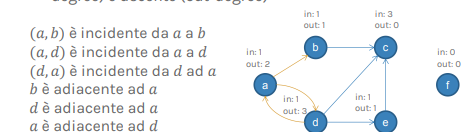
*   la complessità degli algoritmi sui grafi è tipicamente lineare O(n+m) con n = card(V), m = card(E)


*   **grafo completo** = è presente un arco tra ogni coppia di nodi, **grafo pesato** = ad ogni arco viene associato un valore numerico detto peso. il peso è dato dalla funzione w: V x V --> R
*   alcune **operazioni** che vanno ad alterare i nodi ed archi di un grafo sono:

1. inserire/togliere un nodo o un arco
2. restituire tutti i vertici o l'insieme dei nodi adiacenti ad un certo v






ora invece vediamo come rappresentare i grafi (metto direttamente le foto o faccio notte)
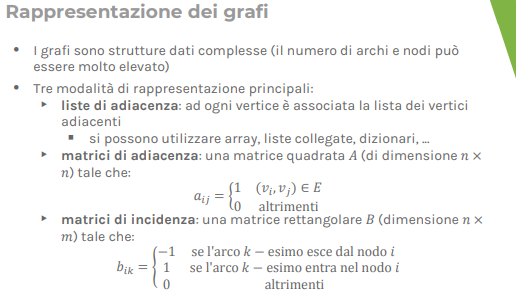

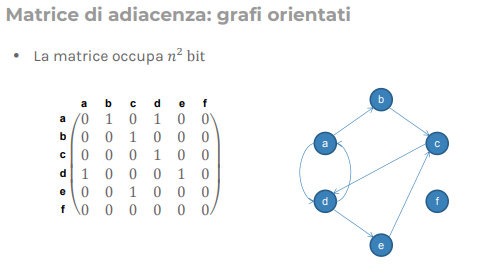

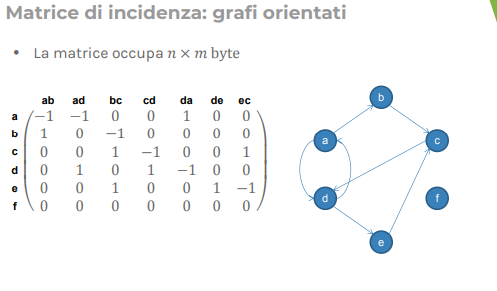

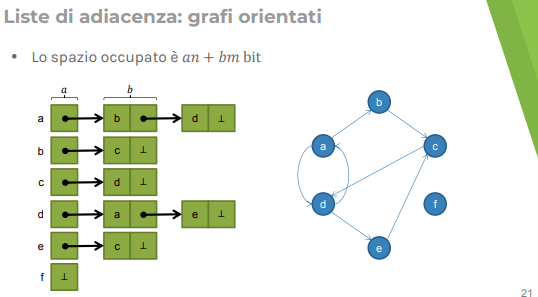

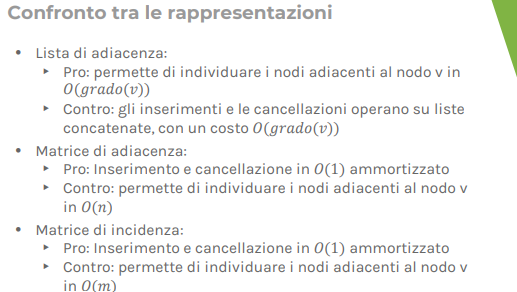

In [ ]:
# implementazione classe grafo pesata con dizionari

class Graph:
  def __init__(self):
    self.nodes = {}

  def vertices(self):
    return self.nodes.keys()

  def __len__(self):
    return len(self.nodes)

  def insertNode(self, u):
    if u not in self.nodes:
      self.nodes[u]={}

  def adj(self, u):
    if u in self.nodes:
      return self.nodes[u]

  def insertEdge(self, u, v, w = 0):
    self.insertNode(u)
    self.insertNode(v)
    self.nodes[u][v]= w

In [ ]:
graph = Graph()
miao = [ ('a','b',3), ('a','d',2), ('b','c',5),('c','d',9), ('c','e',1), ('d','e',4)]

for u,v,w in miao:
  graph.insertEdge(u,v,w)

graph.insertNode('f')

for u in graph.vertices():
  print(u, '-->', graph.adj(u))

a --> {'b': 3, 'd': 2}
b --> {'c': 5}
d --> {'e': 4}
c --> {'d': 9, 'e': 1}
e --> {}
f --> {}


***VISITE DI GRAFI***

il problema della visita dei grafi è simile a quella degli alberi, infatti noi vogliamo visitare tutti i nodi del grafo.

dato un grafo G = (V, E) e un vertice r appartenente a V, vogliamo visitare una e una sola volta tutti i nodi del grafo, abbiamo due approcci:
1. *visita in ampiezza* (**BFS**) o visita per livelli: si visita la sorgente e poi i nodi a distanza 1 poi quelli a ditanza 2 etc.
2. *visita in profondità* (**DFS**) o visita ricorsiva: per ogni nodo adiacente si visita ricorsivamente il nodo

***visita in ampiezza - BFS***

la visita in ampiezza fa uso di una coda per memorizzare tutti i nodi adiacenti al nodo v visitato, i quali porteranno ad un nodo non marcato (poiché non adiacente a v, e quindi scoperto). da qui i nodi non marcati vengono raggiunti e quindi marcati. la visita procede estraendo il nodo successivo dalla coda.

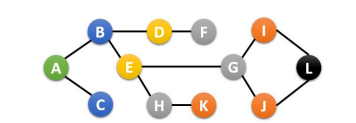

**la BFS è un graph traversal algorithm**, ovvero: esplora tutti i vertici in un grafo alla profondità corrente prima di muoversi e visitare vertici ad un livello più profondo. inizia tutto ad uno specifico vertice e si visitano gli adiacenti e poi si continua nella direzione del primo non marcato.

solitamente questo tipo di algoritmo è *usato nei problemi di shortest path nei grafi.*

vediamo un attimo l'algoritmo di visita:

1. *inizio*: si accoda il nodo ad una coda (queue) e lo si marca come visitato

2. *finché la coda non è vuota*:


*   si toglie un nodo dalla coda e lo si visita (per  es. stampandone il valore)
*   per ogni nodo adiacente non visitato si accoda alla coda e lo si marca come visitato.

*questo algoritmo assicura che tutti i nodi del grafo sono visitati in ampiezza.*


vediamo un esempio di come funziona l'algoritmo:

*   **STEP 1**:  all'inizio sia la coda che l'array visited sono vuoti
*   **STEP 2**: abbiamo 0 come primo nodo che viene inserito sia nella coda che in visited
*   **STEP 3**: 0 viene marcato come visitato e quindi rimosso dalla coda, avendo due nodi adiacenti (1, 2) vengono messi nella coda. quando vengono visitati vengono rimossi e messi nell'array visited.
*   **STEP 4**: il nodo 1 aveva come adiacente 3 che viene messo nella coda dopo il 2. quando il 2 viene visitato vediamo che il 4 è un suo adiacente e viene messo nella cosa dopo il 3


*   **STEP 5**: 3 e 4 non hanno adiacenti e quindi non verrà aggiunto niente alla coda e quindi una volta visitati questi due la coda sarà vuota e l'algoritmo di visita termina

*(QUI SOTTO LA FOTO DELLO STEP 3)*

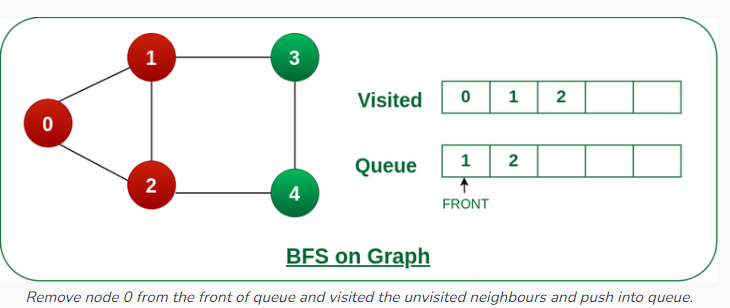





***visita in profondità - DFS***

vediamo direttamente l'algoritmo:



*   **STEP 1**: all'inizio sia lo stack (pila) che l'array visited sono vuoti,
*   **STEP 2**: poniamo lo 0 come nodo visitato e mettiamo i suoi adiacenti nello stack
*   **STEP 3**: visitando il nodo 1, lo mettiamo in visited e lo togliamo dallo stack e ripetiamo per 2  e aggiungiamo allo stack i rispettivi adiacenti in questo caso 4
*   **STEP 4**: questa è la differenza con BFS, continuiamo con gli adiacenti di 2 e quindi 4, solo dopo aver finito questo diciamo 'ramo' andremo a visitare 3

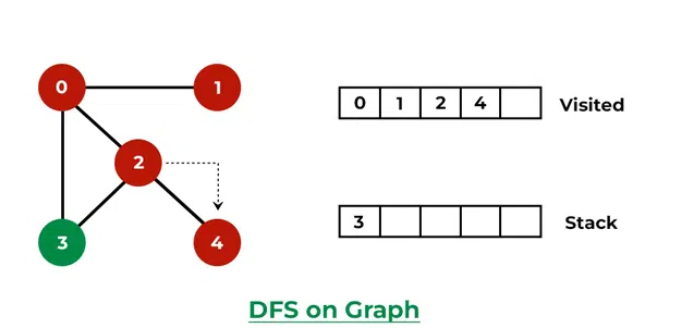


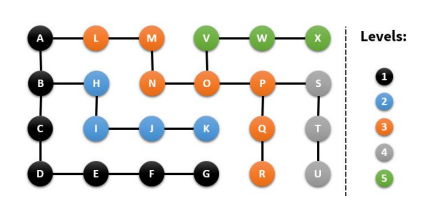



***DIFFERENZE TRA BFS E DFS***

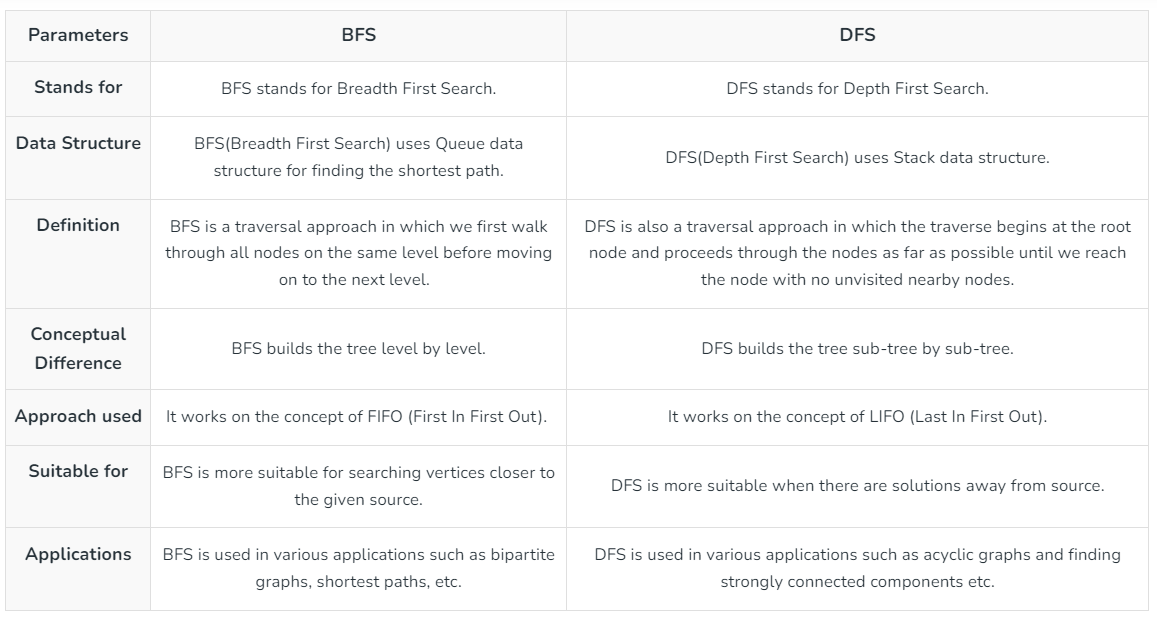

***DIFFERENZA TRA GRAFO DIRETTO E INDIRETTO***

la differenza risiede semplicemente nella **tipologia di arco che collega due nodi**; nel caso di un grafo diretto abbiamo archi che sono orientati ovvero occorre una distinzione tra il grafo "di partenza" e "di arrivo". nel caso del grafo indiretto, gli archi non hanno una direzione orientata ed è quindi bidirezionale. al livello di rappresentazione, se l'arco è orientato viene indicato il verso di percorrenza con una freccia.

*NB:* nella rappresentazione con matrici di adiacenza, nel grafo diretto non è simmetrica, mentre lo è nell'indiretto.

***GRAFO CONNESSO***

dobbiamo distinguere se siamo in un grafo orientato o non:
* siamo in un grafo non orientato --> G è **CONNESSO** se per ogni coppia di vertici u, v esiste una sequenza di archi che li collega
* siamo in un grafo orientato --> si differenzia in:
1. **DEBOLMENTE CONNESSO** =  il rispettivo grafo non orientato è connesso
2. **FORTEMENTE CONNESSO** = se ogni coppia di vertici u, v ha un percorso diretto da u a v e viceversa

# DA QUI IN POI SCRIVO QUALHE IMPLEMENTAZIONE CHE POI SPOSTERO' NEI VARI PARAGRAFI

In [ ]:
#### IMPLEMENTAZIONE CODE (QUEUE) ####

class Queue:
  def __init__(self):
    self.queue = []

  def enqueue(self, item):  # aggiunge item alla fine della coda
    self.queue.append(item)

  def dequeue(self): # rimuove e ritorna il primo elemento della coda
    if not self.isEmpty():
      return self.queue.pop(0)
    else:
      return IndexError("dequeue from an empty queue")

  def isEmpty(self):
    return len(self.queue) == 0

  def size(self):
    return len(self.queue)

  def front(self): # ritorna l'elemento all'inizio della coda senza rimuoverlo
    if not self.isEmpty():
      return self.queue[0]
    else:
      return IndexError("front from an empty queue")


In [ ]:
#### ESEMPIO UTILIZZO ####
q = Queue()
q.enqueue(1)
q.enqueue(2)
print(q.size()) # output: 2
print(q.dequeue()) # dovrebbe dare 1
print(q.front()) # dovrebbe dare 2
print(q.size()) # output: 1

2
1
2
1


In [ ]:
#### IMPLEMENTAZIONE PILE (STACK) ####

class Stack:
  def __init__(self):
    self.stack = []

  def push(self, item): # aggiunge item in cima allo stack
    self.stack.append(item)

  def pop(self): # rimuove e ritorna l'elemento in cima
    if not self.isEmpty():
      return self.stack.pop()
    else:
      raise IndexError("pop from an empty stack")

  def isEmpty(self):
    return len(self.stack) == 0

  def size(self):
    return len(self.stack)

  def top(self): #come pop() ma non rimuove l'elemento
    if not self.isEmpty():
      return self.stack[-1]
    else:
      raise IndexError("top from an empty stack")


In [ ]:
#### ESEMPIO UTILIZZO ####

s = Stack()
s.push(1)
s.push(2)
print(s.pop()) # output: 2
print(s.top()) # output: 1

2
1


In [ ]:
#### IMPLEMENTAZIONE GRAFO INDIRETTO ####
#ricorda: sopra ci sta un'altra implementazione della classe grafo, devo confronarla
class undirectedGraph:
  def __init__(self):
    self.adjList = {}

  def add_node(self,node):
    if node not in self.adjList:
      self.adjList[node] = []
    else:
      raise IndexError("nodo già presente")

  def add_edge(self, node1, node2):
    # se i due nodi non esistono, li crea
    if node1 not in self.adjList:
      self.add_node(node1)
    if node2 not in self.adjList:
      self.add_node(node2)
    # crea l'arco tra i due
    self.adjList[node1].append(node2)
    self.adjList[node2].append(node1)

  def remove_edge(self, node1, node2):
    if node1 in self.adjList and node2 in self.adjList[node1]:
            self.adjList[node1].remove(node2)
    if node2 in self.adjList and node1 in self.adjList[node2]:
            self.adjList[node2].remove(node1)

  def remove_node(self, node):
    if node in self.adjList:
      for neighbor in self.adjList[node]:
        self.adjList[neighbor].remove(node)
      del self.adjList[node]

  def __str__(self):
    return str(self.adjList)




In [ ]:
#### ESEMPIO UTILIZZO ####

g = undirectedGraph()
g.add_node('A')
g.add_node('B')
g.add_edge('A', 'B')
g.add_edge('A', 'C')
print(g)

{'A': ['B', 'C'], 'B': ['A'], 'C': ['A']}


In [ ]:
#### IMPLEMENTAZIONE GRAFO DIRETTO ####
# senza che riscrivo tutto possiamo usare il principio di ereditarietà tra classi
# riscrivendo solo i metodi add_edge e remove_edge

class directedGraph(undirectedGraph):
  def add_edge(self, from_node, to_node):
    # se non esistono creiamo i due nodi
    if from_node not in self.adjList:
      self.add_node(from_node)
    if to_node not in self.adjList:
      self.add_node(to_node)
    # creiamo l'arco orientato
    self.adjList[from_node].append(to_node)

  def remove_edge(self, from_node, to_node):
    # l'if controlla se esiste l'arco in questione
    if from_node in self.adjList and to_node in self.adjList[from_node]:
      self.adjList[from_node].remove(to_node)


In [ ]:
#### ESEMPIO UTILIZZO ####

g = directedGraph()
g.add_node('A')
g.add_node('B')
g.add_edge('A', 'B')
g.add_edge('A', 'C')
print(g)

{'A': ['B', 'C'], 'B': [], 'C': []}


In [ ]:
#### IMPLEMENTAZIONE BFS #### (grafo indiretto)
# UTILIZZO DELLA CLASSE QUEUE FATTA PRIMA

def bfs(graph, start_node):
  visited = set()
  queue = Queue()
  queue.enqueue(start_node)
  visited.add(start_node)

  while not queue.isEmpty():
    current_node = queue.dequeue()
    print(current_node) # qualsiasi operazione vogliamo, giusto per far vedere che visitiamo il nodo

    for neighbor in graph.adjList[current_node]:
      if neighbor not in visited:
        queue.enqueue(neighbor)
        visited.add(neighbor)

In [ ]:
#### ESEMPIO DI UTILIZZO ####

g = undirectedGraph()
g.add_node('A')
g.add_node('B')
g.add_node('C')
g.add_edge('A', 'B')
g.add_edge('A', 'C')
bfs(g, 'A')  # Output: A B C (o A C B a seconda dell'ordine)

A
B
C


In [ ]:
#### IMPLEMENTAZIONE DFS #### (grafo indiretto)
# UTILIZZO DELLA CLASSE STACK FATTA PRIMA

# VERSIONE ITERATIVA

def dfs_iterative(graph, start_node):
  visited = set()
  stack = Stack()
  stack.push(start_node)

  while not stack.isEmpty():
    current_node = stack.pop()

    if current_node not in visited:
      print(current_node) # qualsiasi altra operazione è valida
      visited.add(current_node)

      for neighbor in graph.adjList[current_node]:
        if neighbor not in visited:
          stack.push(neighbor)


In [ ]:
#### IMPLEMENTAZIONE DFS #### (grafo indiretto)
# UTILIZZO DELLA CLASSE STACK FATTA PRIMA

# VERSIONE RICORSIVA

def dfs_recursive(graph, node, visited = None):
  if visited is None:
    visited = set()

  visited.add(node)
  print(node)

  for neighbor in graph.adjList[node]:
    if neighbor not in visited:
      dfs_recursive(graph, neighbor, visited)

In [ ]:
#### ESEMPIO DI UTILIZZO ####

g = undirectedGraph()
g.add_node('A')
g.add_node('B')
g.add_node('C')
g.add_edge('A', 'B')
g.add_edge('A', 'C')

dfs_recursive(g, 'A')
#dfs_iterative(g, 'A')  # Output: A C B (o A B C a seconda dell'ordine)

A
B
C


*ora è importante vedere la complessità degli algoritmi bfs e dfs perché eres muy important*.



*   BFS --> la complessità dipende dal numero di nodi (V) e dal numero di archi (E). ogni nodo viene visitato una sola volta quindi abbiamo O(V), mentre ogni arco viene visitato una volta sola quando il nodo viene visitato quindi O(E)
*   DFS --> stesso ragionamento sopra

potrebbe creare confusione i due cicli while e for annidati, ma semplicemente stiamo visitando ogni nodo e ciascuno dei suoi archi una volta sola nel complesso e quindi avremo **O(E + V)**

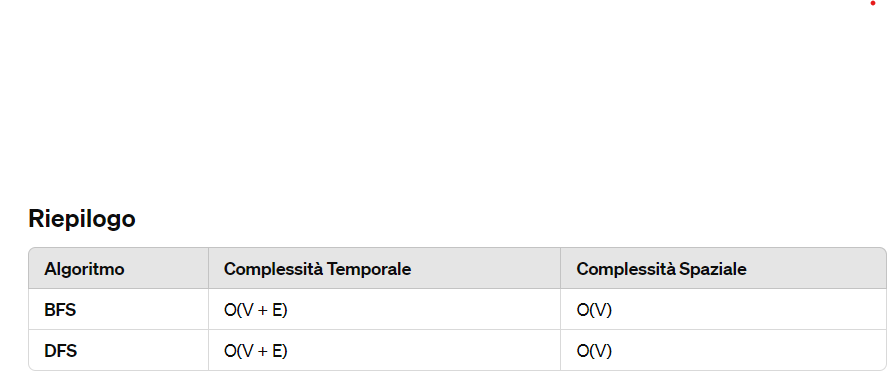



**PROBLEMA DEL CAMMINO MINIMO**

il problema del cammino minimo consiste nel ***trovare il percorso più breve tra due nodi, considerando il peso degli archi.*** esistono vari tipi di algoritmi per affrontare questo problema in base alle *caratteristiche del grafo* (peso, presenza archi negativi, etc.)

vediamo i principali algoritmi:


1.   ***algoritmo di dijkstra***

2.   ***algoritmo di bellman-ford***








**DIFFERENZA GRAFO CONNESSO E NON CONNESSO**

l'unica differenza esistente risiede nella presenza o meno di percorsi (archi) tra i nodi del grafo.

1. **grafo connesso**  - ->
un grafo è definito connesso se esiste un percorso tra una qualsiasi coppia di nodi e quindi ogni coppia u, v del grafo esiste una sequenza di archi che permette di andare da u a v; e qui possiamo porre un'ulteriore distinzione in:


*   ***grafo non diretto***: ogni nodo può essere raggiunto da un altro nodo tramite una sequenza di archi
*   ***grafo diretto***:  è fortemente connesso se esiste (per ogni coppia u,v) un percorso diretto, altrimenti è debolmente connesso

2. **grafo non connesso** - -> se esiste almeno una coppia per cui non esiste un collegamento.

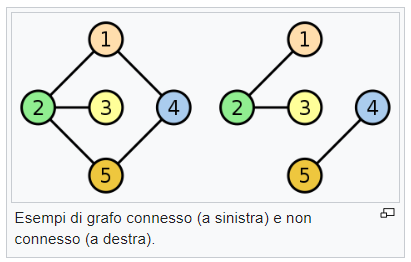



**MST (MINIMUN SPANNING TREE)** (solo prim e kruskal)

sia G = (V, E) un grafo non orientato, connesso e pesato. assumiamo che i nodi rappresentino delle città, il nostro problema è quello di *cercare un insieme T di strade (archi) tale che ogni città sia raggiungibile da ogni altra e tale da minimizzare la somma del peso degli archi* (= costruzione delle strade)

*i pesi associati agli archi sono positivi* e quindi il sottografo che andremo a creare (G') è connesso e senza cicli --> questo problema è noto come "problema del minimo albero ricoprente" (MST)

in generale la soluzione di questo problema non è unica.

***NB:*** per risolvere questo problema useremo un algoritmo goloso (greedy) in particolare ***l'algoritmo di kruskal e di Prim.***

***ALGORITMO DI KRUSKAL***

ordina gli archi secondo costi crescenti e costruisce un insieme ottimo di archi T, scegliendo di volta in volta un arco di peso minimo che non forma cicli con gli archi già scelti.

dall'insieme V si gestisce una partizione W = {w1, ..., wk} con wi insieme che include i nodi per cui è stato scelto un insieme di archi che li collega. quindi inizialmente avremo T = {} e W = {{1}, ..., {n}} poiché nessun arco è stato scelto e nessun arco collegato.

alla prima iterazione viene preso il nodo (u,v) di peso minimo, posto in T e {u},{v} vengono sostituiti con {u,v}.

alla generica iterazione i, esaminiamo l'arco (x,y) che viene inserito in T solo se i nodi x e y non appartengono allo stesso insieme della partizione W ( l'arco non forma cicli con archi inseriti in precedenza)

sotto un esempio di kruskal, non l'ho messo tutto ma solo un pezzo per far capire cosa prende e cosa no (si va in ordine crescente sul peso degli archi)

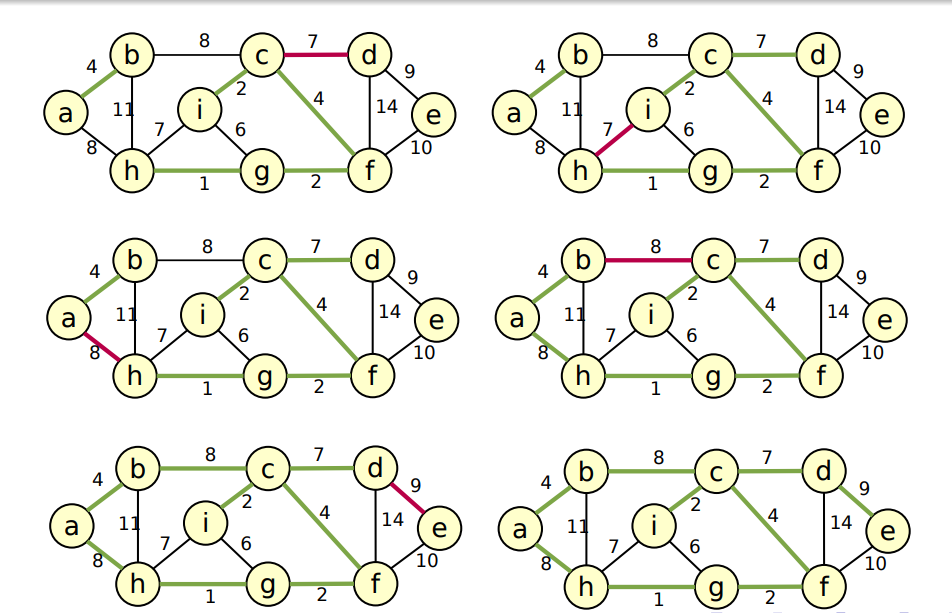

In [ ]:
#### IMPLEMENTAZIONE ALG. DI KRUSKAL ####
#struttura che ci aiuta a gestire un insieme
#di elementi partizionati in insiemi disgiunti

class unionFind:
  def __init__(self, size):
    self.parent = list(range(size)) #inizialmente ogni elemento punta se stesso
    self.rank = [0]* size # usata per ottimizzare l'operazione di unione

  def find(self,u): #determina a quale insieme appartiene un elemento
    if self.parent[u] != u:
      self.parent[u] = self.find(self.parent[u])

    return self.parent[u] #restituisce il rappresentante dell'insieme contenente u

  def union(self, u, v): #unisce due insiemi in uno solo
    root_u = self.find(u)
    root_v = self.find(v)

    if root_u != root_v:
      if self.rank[root_u] > self.rank[root_v]: #unisce gli insiemi in base al rango
            self.parent[root_v] = root_u

      elif self.rank[root_u] < self.rank[root_v]:
            self.parent[root_u] = root_v

      else:
            self.parent[root_v] = root_u
            self.rank[root_u] += 1


def kruskal(graph):
  edges = []
  for u in graph: #estraiamo tutti gli archi dal grafo per rappresentarli come tuple
    for v, weight in graph[u]:
      edges.append((weight, u, v))

  edges.sort() #semplice ordinamento
  uf = unionFind(len(graph))
  mst = [] # lista degli archi di copertura minima
  tot = 0

  for weight, u, v in edges:
    if uf.find(u) != uf.find(v): #se appartengono ad insiemi diversi
      uf.union(u,v) #allora li unisce
      mst.append((u, v, weight)) #e aggiunge l'arco
      tot += weight

  return mst, tot #restituisce la lista degli archi e il costo





***ALGORITMO DI PRIM***

è essenzialmente un algoritmo di visita che partendo da un nodo iniziale u (scelto arbitrariamente) esamina tutti i nodi del grafo. quindi si parte da un nodo v e si visita un nodo w (scelto con opportuni criteri) e si pone l'arco (v,w) nell'insieme T che al termine conterrà una soluzione ottima.

la differenza rispetto ad un algoritmo di visita vero e proprio, è che la scelta del prossimo nodo da visitare viene fatta introducendo un concetto di priorità tra nodi, e che l'insieme Q dei nodi da visitare viene gestito come coda di priorità. quindi se R è l'insieme dei nodi visitati, la priorità di un nodo v (appartenente a Q) è pari al minimo peso di un arco che collega v con un nodo in R.

viene insierito in T l'arco (v,u) che risulta di peso minimo tra tutti quelli che collegano u con un nodo in R.

qui sotto in teoria è quello che  dovrebbe uscire fuori

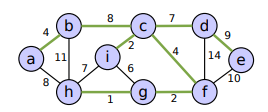

In [ ]:
#### IMPLEMENTAZIONE ALG. PRIM ####

import heapq

def prim(graph):
  num_nodes = len(graph) # numero nodi del grafo
  mst = []
  tot = 0

  visited = [False]* num_nodes # tiene conto dei nodi visitati o meno
  min_heap = [(0,0)] # (peso, nodo) inizializzazione (è la coda di priorità)

  while min_heap:
    weight, u = heapq.heappop(min_heap) #estrae l'arco con il peso minimo

    if visited[u]:
      continue

    visited[u] = True # marca il nodo u come visitato
    tot += weight # aggiorna il costo (peso)

    for v, w in graph[u]: #per ogni nodo v adiacente a u
      if not visited[v]:
        heapq.heappush(min_heap, (w,v)) #aggiunge l'arco (w, v) alla coda di priorità
        mst.append((u, v, w))

  return mst, tot

In [ ]:
#### ESEMPIO DI UTILIZZO ####
# Esempio di grafo rappresentato come un dizionario di liste di tuple (nodo, peso)
graph = {
    0: [(1, 4), (2, 3)],
    1: [(0, 4), (2, 1), (3, 2)],
    2: [(0, 3), (1, 1), (3, 4)],
    3: [(1, 2), (2, 4)]
}

# Esecuzione dell'algoritmo di Prim
mst, total_cost = prim(graph)

# Output dei risultati
print("Archi nell'albero di copertura minimo:", mst)
print("Costo totale dell'albero di copertura minimo:", total_cost)

Archi nell'albero di copertura minimo: [(0, 1, 4), (0, 2, 3), (2, 1, 1), (2, 3, 4), (1, 3, 2)]
Costo totale dell'albero di copertura minimo: 6


***GRAFI CON ARCHI NEGATIVI:***

sono semplicemente dei grafi in cui alcuni archi hanno un peso negativi, sono interessanti perché si cambia il modo per trovare i percorsi minimi (o altri problemi di ottimizzazione)

***NB:*** mentre un ***CICLO*** è un percorso che inizia e termina allo stesso nodo senza ripetere archi o nodi. abbiamo alcuni tipi di ciclo:


1.   *ciclo semplice:* non vengono ripetuti i nodi
2.   *ciclo negativo/positivo:* la somma dei pesi è negativa/positiva. in particolare i grafi con cicli negativi sono particolarmente interessanti nei problemi di ottimizzazione.



***ALGORITMO DI DIJKSTRA***

questo algoritmo risolve il problema del ***percorso minimo per i grafi con pesi non negativi***, utile soprattutto in reti di trasporto.

vediamo come funziona l'algoritmo:

1.  viene utilizzata una coda di priorità per mantenere i nodi con la distanza minima corrente. all'inizio la sorgente ha dist. zero e le altre sono a infinito.
2. viene estratto il nodo con la distanza minima dalla coda e si aggiornano le distanze dei vicini di questo nodo.
3. si ripete fino a quando tutti i nodi sono stati visitati oppure la coda di priorità è vuota.


In [ ]:
#### IMPLEMENTAZIONE ALG. DIJKSTRA ####

import heapq

def dijkstra(graph, source):
  # STEP 1
  # dizionario che tiene traccia della distanza minima dalla sorgente a ciascun nodo
  dist ={node: float('inf') for node in graph}
  dist[source] = 0
  coda = [(0, source)] #(distanza, nodo)

  # STEP 2

  while coda:
    curr_dist, u = heapq.heappop(coda) #estrae il nodo con distanza minima dalla coda

    if curr_dist > dist[u]:
      continue

    for neighbor, weight in graph[u]:
      distance = curr_dist + weight
      if distance < dist[neighbor]:
        dist[neighbor] = distance #aggiornamento della distanza se ne viene trovata una più breve
        heapq.heappush(coda, (distance, neighbor)) # inserisce il vicino nella coda con la nuova distanza

  return dist

***LIMITAZIONE***: ***pesi negativi*** --> non può gestire grafi con pesi negativi




***ALGORITMO BELLMAN-FORD***

utilizzato per trovare il percorso minimo da un nodo sorgente a tutti gli altri nodi del grafo, anche quando gli archi hanno pesi negativi, può inoltre rilevare cicli di peso negativo.

vediamo come funziona l'algoritmo:

1. imposta la distanza sorgente-altri nodi ad infinito, tranne quella della sorgente stessa a zero.
2. rilassamento degli archi: per ogni arco (u,v) con peso w, se la distanza a u + w è minore della distanza a v allora si aggiorna a v.
3. si esegue un'ulteriore iterazione su tutti gli archi per verificare se è possibile rilassare ulteriormente, se è possibile vuol dire che esiste un ciclo negativo

In [ ]:
#### IMPLEMENTAZIONE ALG. BELLMAN-FORD ####


***CONFRONTO TRA TUTTI E QUATTRO GLI ALGORITMI***

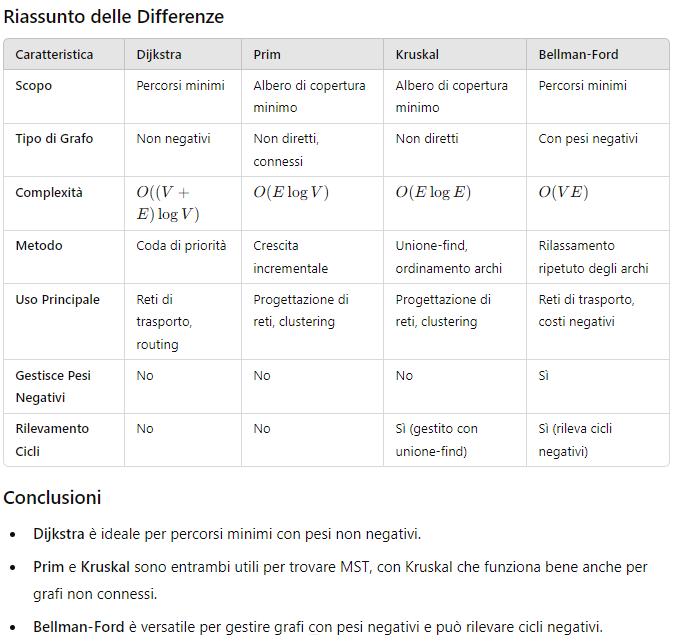